In [5]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
import seaborn as sn
import tensorflow as tf

In [6]:
# Load training set
dataframes_training_metadata = pd.read_csv('data/training_set_metadata.csv')
dataframes_training_metadata = dataframes_training_metadata.values

# Shuffle for the training dataset
idx = np.arange(dataframes_training_metadata.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
dataframes_training_metadata = dataframes_training_metadata[idx]

y = dataframes_training_metadata[:,[11]]
# Extract columns from the training set so that they match the columns from test set below
X = np.nan_to_num(dataframes_training_metadata[:,[0,1,2,5,6,7,8,9,10]])

# Load test set (A large subset of the test set)
dataframes_test_metadata = pd.read_csv('data/plasticc_test_metadata.csv')
dataframes_test_metadata = dataframes_test_metadata.values

# Shuffle for the test dataset
idx = np.arange(dataframes_test_metadata.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
dataframes_test_metadata = dataframes_test_metadata[idx]

X_test = np.nan_to_num(dataframes_test_metadata[300000:500000,:9])
y_test = dataframes_test_metadata[300000:500000,[10]]

# Use some of the test data as training
y = np.append(y,dataframes_test_metadata[:300000,[10]],0)
X = np.append(X,np.nan_to_num(dataframes_test_metadata[:300000,:9]),0)


In [4]:
# List the frequencey of each class in the training dataset
count = 0
summ = 0
y_len = len(y)
classes = np.unique(y)
w = {}
for class_ in classes:    
    for i in range(y_len):
        if(y[i] == class_):
            count+=1
    print(class_,count)
    summ += count
    w[class_]=(count/y_len)
    count = 0
print(w)

6.0 273
15.0 1685
16.0 9090
42.0 87145
52.0 5753
53.0 140
62.0 15657
64.0 116
65.0 9114
67.0 3707
88.0 9165
90.0 144526
92.0 17139
95.0 3262
991.0 52
992.0 140
993.0 788
994.0 96
{6.0: 0.0008868012785530521, 15.0: 0.005473480418908033, 16.0: 0.02952755905511811, 42.0: 0.283078012525662, 52.0: 0.018687793976248018, 53.0: 0.00045476988643746265, 62.0: 0.050859515085366805, 64.0: 0.00037680933447675475, 65.0: 0.029605519607078818, 67.0: 0.012041656921597671, 88.0: 0.029771185779995324, 90.0: 0.46947194719471946, 92.0: 0.055673579168940515, 95.0: 0.01059613835399288, 991.0: 0.0001689145292482004, 992.0: 0.00045476988643746265, 993.0: 0.0025597047893765753, 994.0: 0.00031184220784283154}


In [20]:
clf = LogisticRegression(multi_class = 'ovr').fit(X, y)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.47


In [ ]:
# Running a SVC classifier using crammer_singer strategy for multi class classification. 
# NOT recommended according to scikit-learn documentation

SVC_CS = LinearSVC(multi_class="crammer_singer")
Predictions_SVC_CS = SVC_CS.fit(X, y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_CS), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_CS)), "\n")
print("The accuracy for Linear SVC Crammer Singer classifier is " + "{:.2%}".format(SVC_CS.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Running a SVC classifier using One-Vs-Rest strategy for multi class classification.
SVC_OVR = LinearSVC(multi_class="ovr")
Predictions_SVC_OVR = SVC_OVR.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVR), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_OVR)), "\n")
print("The accuracy for Linear SVC One-Vs-Rest classifier is " + "{:.2%}".format(SVC_OVR.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [ 42.  65.  90.  92. 993.] 

Missing the following classes in the prediction [  6.  15.  16.  52.  53.  62.  64.  67.  88.  95. 991. 992. 994.] 

The accuracy for Linear SVC One-Vs-Rest classifier is 35.06%


In [3]:
# Running a OneVsOneClassifier classifier using LinearSVC as the estimator.
SVC_OVO = OneVsOneClassifier(LinearSVC(penalty='l1', dual=False, tol=1e-13), -1)
Predictions_SVC_OVO = SVC_OVO.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_OVO)), "\n")
print("The accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(SVC_OVO.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [42. 65. 90. 92. 95.] 

Missing the following classes in the prediction [  6.  15.  16.  52.  53.  62.  64.  67.  88. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 53.96%


In [ ]:
# Running a OneVsOneClassifier classifier using LinearSVC as the estimator. (Balanced)
C_values = [0.001, 1, 100, 1000, 10000]
classes = np.unique(y_test)
test_acc = {}
train_acc = {}

for C_value in C_values:
    SVC_OVO_BL = OneVsOneClassifier(LinearSVC(random_state=112, C=C_value, penalty='l2', dual=True, tol=1e-13, class_weight='balanced', fit_intercept=False), -1)
    Predictions_SVC_OVO_BL = SVC_OVO_BL.fit(X,y).predict(X_test)
    print("For C = ", C_value)
    print("The original classes in the test set are",classes , "\n")
    print("The predicted classes are", np.unique(Predictions_SVC_OVO_BL), "\n")
    print("Missing the following classes in the prediction", np.setdiff1d(classes,np.unique(Predictions_SVC_OVO_BL)), "\n")
    test_accuracy = SVC_OVO_BL.score(X_test, y_test)
    print("The accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(test_accuracy))
    train_accuracy = SVC_OVO_BL.score(X, y)
    print("The training accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(train_accuracy))

    test_acc[C_value] = test_accuracy
    train_acc[C_value] = train_accuracy
print("Final Test Accuracies: ", test_acc)
print("Final Train Accuracies: ", train_acc)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For C =  0.001
The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [16. 42. 65. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  52.  53.  62.  64.  67.  88.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 39.89%
The training accuracy for Linear SVC One-Vs-One classifier is 39.35%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Running a OneVsOneClassifier classifier on transformed features using LinearSVC as the estimator.
C_values = [0.001, 1, 100, 1000, 10000]
classes = np.unique(y_test)
test_acc = {}
train_acc = {}
losses_dict = {}
scaler1 = StandardScaler()
scaler1.fit(X)
f_scaled_train = scaler1.transform(X)
scaler1.fit(X_test)
f_scaled_test = scaler1.transform(X_test)

for comp in range(2,10,2):
    ar_train_acc = []
    ar_test_acc = []
    losses_per_ncomponent = []

    pca1 = PCA(n_components = comp)
    pca1.fit(f_scaled_train)
    feature_scaled_pca_train = pca1.transform(f_scaled_train)
    pca1 = PCA(n_components = comp)
    pca1.fit(f_scaled_test)
    feature_scaled_pca_test = pca1.transform(f_scaled_test)

    for C_value in C_values:
        SVC_OVO = OneVsOneClassifier(LinearSVC(random_state=112, C=C_value, penalty='l2', dual=True, tol=1e-13, class_weight='balanced', fit_intercept=False), -1
        )

        Predictions_SVC_OVO = SVC_OVO.fit(feature_scaled_pca_train,y).predict(feature_scaled_pca_test)
        print("The original classes in the test set are", classes, "\n")
        print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
        print("Missing the following classes in the prediction", np.setdiff1d(classes,np.unique(Predictions_SVC_OVO)), "\n")
        test_accuracy = SVC_OVO.score(feature_scaled_pca_test, y_test)
        print("The test accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(test_accuracy))
        ar_test_acc.append(test_accuracy)
        train_accuracy = SVC_OVO.score(feature_scaled_pca_train, y)
        print("The train accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(train_accuracy))
        ar_train_acc.append(train_accuracy)
        losses_per_ncomponentLogLoss(y_test ,Predictions_SVC_OVO)
    test_acc[comp] = ar_test_acc
    train_acc[comp] = ar_train_acc
        
print("Final Test Accuracies: ", test_acc)
print("Final Train Accuracies: ", train_acc)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  53.  64.  92.  95. 994.] 

Missing the following classes in the prediction [ 15.  16.  42.  52.  62.  65.  67.  88.  90. 991. 992. 993.] 

The test accuracy for Linear SVC One-Vs-One classifier is 3.60%
The train accuracy for Linear SVC One-Vs-One classifier is 4.35%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  64.  92.  95. 994.] 

Missing the following classes in the prediction [ 42.  52.  53.  62.  65.  67.  88.  90. 991. 992. 993.] 

The test accuracy for Linear SVC One-Vs-One classifier is 4.96%
The train accuracy for Linear SVC One-Vs-One classifier is 5.70%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [ 15.  16.  42.  64.  65.  88.  90.  92. 994.] 

Missing the following classes in the prediction [  6.  52.  53.  62.  67.  95. 991. 992. 993.] 

The test accuracy for Linear SVC One-Vs-One classifier is 38.65%
The train accuracy for Linear SVC One-Vs-One classifier is 39.50%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [ 6. 15. 52. 65. 88. 90. 92. 95.] 

Missing the following classes in the prediction [ 16.  42.  53.  62.  64.  67. 991. 992. 993. 994.] 

The test accuracy for Linear SVC One-Vs-One classifier is 36.01%
The train accuracy for Linear SVC One-Vs-One classifier is 38.52%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [15. 16. 65. 90. 92. 95.] 

Missing the following classes in the prediction [  6.  42.  52.  53.  62.  64.  67.  88. 991. 992. 993. 994.] 

The test accuracy for Linear SVC One-Vs-One classifier is 21.85%
The train accuracy for Linear SVC One-Vs-One classifier is 22.05%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  64.  65.  67.  88.  90.  92.  95. 991.
 992. 994.] 

Missing the following classes in the prediction [ 62. 993.] 

The test accuracy for Linear SVC One-Vs-One classifier is 9.65%
The train accuracy for Linear SVC One-Vs-One classifier is 9.85%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  64.  65.  67.  88.  90.  92.  95. 991.
 992. 993. 994.] 

Missing the following classes in the prediction [62.] 

The test accuracy for Linear SVC One-Vs-One classifier is 14.21%
The train accuracy for Linear SVC One-Vs-One classifier is 14.94%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 29.94%
The train accuracy for Linear SVC One-Vs-One classifier is 30.30%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 24.05%
The train accuracy for Linear SVC One-Vs-One classifier is 26.52%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 20.36%
The train accuracy for Linear SVC One-Vs-One classifier is 22.12%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  64.  65.  67.  88.  90.  92.  95. 991.
 992. 993. 994.] 

Missing the following classes in the prediction [62.] 

The test accuracy for Linear SVC One-Vs-One classifier is 12.21%
The train accuracy for Linear SVC One-Vs-One classifier is 10.28%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  64.  65.  67.  88.  90.  92.  95. 991.
 992. 993. 994.] 

Missing the following classes in the prediction [62.] 

The test accuracy for Linear SVC One-Vs-One classifier is 18.06%
The train accuracy for Linear SVC One-Vs-One classifier is 21.06%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 36.21%
The train accuracy for Linear SVC One-Vs-One classifier is 40.32%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 27.59%
The train accuracy for Linear SVC One-Vs-One classifier is 31.88%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{2: [0.036, 0.0496, 0.3865, 0.36, 0.2185], 4: [0.0965, 0.1421, 0.2994, 0.24, 0.2036], 6: [0.1221, 0.18, 0.3621, 0.2759, 0.2563], 8: [0.0755, 0.1024, 0.3278, 0.2323, 0.2656]}


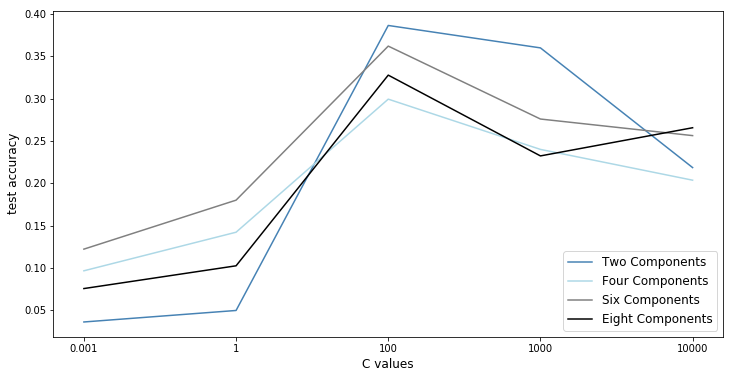

In [19]:
# Plot Accuracy VS n_components for the above classifier
#C_values = np.array([0.001, 1, 100, 1000, 10000])
C_values = np.array(['0.001', '1', '100', '1000', '10000'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(C_values, test_acc[2], color="steelblue", label="Two Components")
ax.plot(C_values, test_acc[4], color="lightblue", label="Four Components")
ax.plot(C_values, test_acc[6], color="grey", label="Six Components")
ax.plot(C_values, test_acc[8], color="black", label="Eight Components")
plt.xticks(C_values)
ax.legend(loc="lower right", fontsize=12)
ax.set_xlabel("C values", fontsize=12)
ax.set_ylabel("test accuracy", fontsize=12)
plt.savefig("SVM-PCA", dpi=200)
plt.show()


In [15]:
# Running a SGD classifier
SGD_clf = SGDClassifier(alpha=0.001, max_iter=100).fit(feature_scaled_pca_train, y)
Predictions_SGD = SGD_clf.predict(feature_scaled_pca_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SGD), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SGD)), "\n")
print("The accuracy for SGD classifier is " + "{:.2%}".format(SGD_clf.score(feature_scaled_pca_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6  15  16  42  52  53  62  64  65  67  88  90  92  95 991 992 993 994] 

The predicted classes are [90] 

Missing the following classes in the prediction [  6  15  16  42  52  53  62  64  65  67  88  92  95 991 992 993 994] 

The accuracy for Linear SVC One-Vs-One classifier is 47.72%


In [ ]:
# Running a SVC classifier
SVC_clf = SVC(decision_function_shape='ovo', random_state=112, C=1, kernel='rbf')
Predictions_SVC_clf = SVC_clf.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_clf), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_clf)), "\n")
print("The accuracy for SVC classifier is " + "{:.2%}".format(SVC_clf.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
# Running a OneVsOneClassifier classifier on transformed features using LinearSVC as the estimator.
classes = np.unique(y_test)

scaler1 = StandardScaler()
scaler1.fit(X)
f_scaled_train = scaler1.transform(X)
scaler1.fit(X_test)
f_scaled_test = scaler1.transform(X_test)

pca1 = PCA(n_components = 6)
pca1.fit(f_scaled_train)
feature_scaled_pca_train = pca1.transform(f_scaled_train)
pca1 = PCA(n_components = 6)
pca1.fit(f_scaled_test)
feature_scaled_pca_test = pca1.transform(f_scaled_test)

SVC_OVO = OneVsOneClassifier(LinearSVC(random_state=112, C=100, penalty='l2', dual=True, tol=1e-13, class_weight='balanced', fit_intercept=False), -1
)

Predictions_SVC_OVO = SVC_OVO.fit(feature_scaled_pca_train,y).predict(feature_scaled_pca_test)

print("The original classes in the test set are", classes, "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(classes,np.unique(Predictions_SVC_OVO)), "\n")
test_accuracy = SVC_OVO.score(feature_scaled_pca_test, y_test)
print("The test accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(test_accuracy))
train_accuracy = SVC_OVO.score(feature_scaled_pca_train, y)
print("The train accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(train_accuracy))


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 36.21%
The train accuracy for Linear SVC One-Vs-One classifier is 40.32%


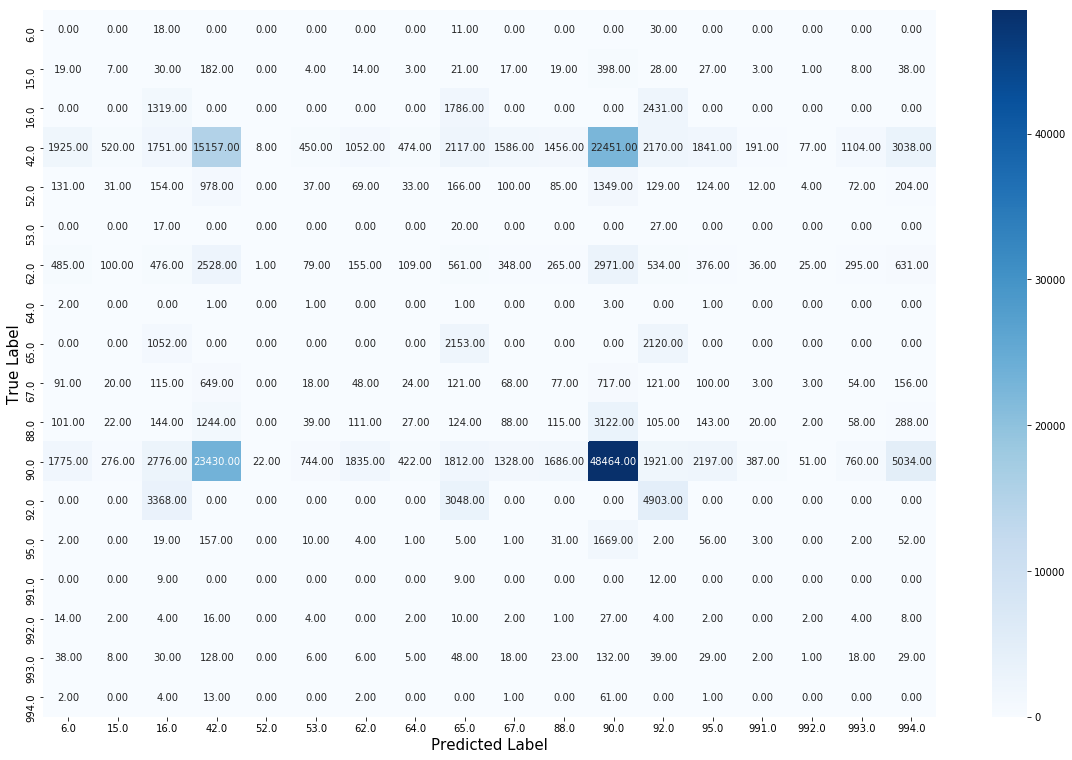

In [19]:
# Confusion matrix for the the best SVC classifier on transformed features using PCA
cf = confusion_matrix(y_test, Predictions_SVC_OVO)
plt.figure(figsize = (20,13))
sn.heatmap(cf, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label', fontsize=15)
plt.ylabel('True Label', fontsize=15)
plt.savefig('SVM_confusion_matrix_500_epochs.png', dpi=200, bbox_inches='tight')
plt.show()

In [31]:
classes = np.sort(np.unique(Predictions_SVC_OVO))
transformed = []
print(len(classes))
for i in range(len(Predictions_SVC_OVO)):
    probabilities = (Predictions_SVC_OVO[i] == classes)*1.0
    #probabilities = np.pad(probabilities, (0, 18), 'constant')
    transformed.append(probabilities)


18
18
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [34]:
N = []
targets = np.unique(y_test)
for i in np.arange(len(targets)):
    N += [len(y_test[y_test == targets[i]])]
w = N/np.sum(N)

print(N)
print(w)

def LogLoss(y_true, y_pred):
    y_clip = tf.clip_by_value(y_pred, 1e-15, 1-1e-15)
    loss = -(tf.reduce_mean(tf.reduce_mean(y_true*tf.math.log(y_clip), axis=0)/w))
    return loss

print(LogLoss(y_test, np.array(transformed)))

[59, 819, 5536, 57368, 3678, 64, 9975, 9, 5325, 2385, 5753, 94920, 11319, 2014, 30, 102, 560, 84]
[2.9500e-04 4.0950e-03 2.7680e-02 2.8684e-01 1.8390e-02 3.2000e-04
 4.9875e-02 4.5000e-05 2.6625e-02 1.1925e-02 2.8765e-02 4.7460e-01
 5.6595e-02 1.0070e-02 1.5000e-04 5.1000e-04 2.8000e-03 4.2000e-04]
tf.Tensor(5763407.000586042, shape=(), dtype=float64)
